In [77]:

# Importation des bibliothèques
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [79]:
#Chargement de data 
data=pd.read_csv('autism_VF.csv')
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,no,18 and more,Self,YES
698,1,0,0,0,0,0,0,1,0,1,34,m,Hispanic,no,no,Mexico,no,18 and more,Parent,NO
699,1,0,1,1,1,0,1,1,0,1,24,f,?,no,no,Russia,no,18 and more,?,YES
700,1,0,0,1,1,0,1,0,1,1,35,m,South Asian,no,no,Pakistan,no,18 and more,Self,NO


In [81]:
labelEncoder = LabelEncoder()
for column in ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
        'age_desc', 'relation', 'Class/ASD']:
    data[column] = labelEncoder.fit_transform(data[column])

print(data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
        'age_desc', 'relation', 'Class/ASD']].head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age  gender  ethnicity  jundice  austim  \
0         1         0          0    9       0         10        0       0   
1         1         0          1    7       1          4        0       1   
2         1         1          1   10       1          4        1       1   
3         1         0          1   18       0         10        0       1   
4         1         0          0   23       0          0        0       0   

   contry_of_res  used_app_before  age_desc  relation  Class/ASD  
0             64   

In [83]:
#on utilisant toute les variables de dataset
X=data.drop('Class/ASD',axis=1)#Features
y=data[['Class/ASD']]#Target
print(X.shape)
print(y.shape)

(702, 19)
(702, 1)


In [85]:
# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
logisticRegression = LogisticRegression(max_iter=1000, solver='liblinear')
logisticRegression.fit(X_train, y_train)

C:\Users\layla\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

In [89]:
y_pred =logisticRegression.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0])

In [91]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[89  2]
 [ 5 45]]


In [93]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Accuracy : 0.950354609929078

Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        91
           1       0.96      0.90      0.93        50

    accuracy                           0.95       141
   macro avg       0.95      0.94      0.94       141
weighted avg       0.95      0.95      0.95       141



In [99]:
# Obtenir les scores d'apprentissage
train_sizes, train_scores, val_scores = learning_curve(
     logisticRegression, 
    X_train, 
    y_train, 
    cv=5,                 # 5-fold cross-validation
    scoring='f1',         # Utiliser le F1-score pour évaluer les performances
    train_sizes=np.linspace(0.1, 1.0, 10),  
    n_jobs=-1             # Utiliser tous les cœurs disponibles pour accélérer
)

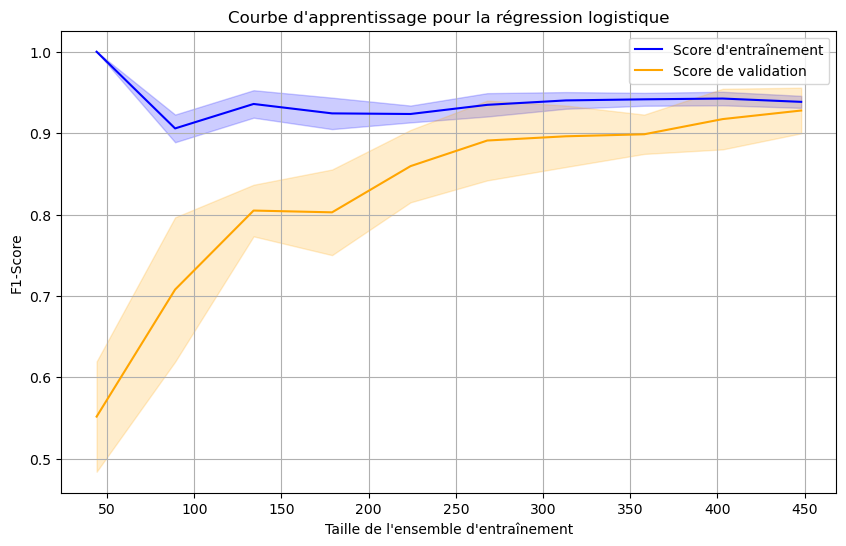

In [101]:


# Moyennes et écarts-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Score d'entraînement", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

plt.plot(train_sizes, val_mean, label="Score de validation", color="orange")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2)

# Ajouter des légendes et un titre
plt.title("Courbe d'apprentissage pour la régression logistique")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("F1-Score")
plt.legend(loc="best")
plt.grid()
plt.show()